## Project - Customer Loan Risk Prediction

### Problem Statement:
An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers, they want to predict who is risky and who is not.

### Data Description

__income__ - Income of the user - _int_

__age__	- Age of the user -	_int_

__experience__ - Professional experience of the user in years -	_int_

__profession__ - Profession - _string_

__married__ - Whether married or single	- _string_

__house_ownership__ - Owned or rented or neither -	_string_

__car_ownership__ -	Does the person own a car -	_string_

__current_job_years__ -	Years of experience in the current job - _int_

__current_house_years__ - Number of years in the current residence - _int_

__city__ - City of residence -	_string_

__state__ -	State of residence - _string_

__risk_flag__ -	Defaulted on a loan - _string_ (Target)

### Imporing the libraries

We will make use of Pandas & Numpy for most of the project.
Matplotlib and Seaborn will serve as a vizualization tool.
For preprocessing, we import re later in the notebook.
Machine Learning algorithms are imported later on in the notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv(r'C:\Users\KIIT\Downloads\Training Data.csv')
train.head() #Viewing the data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Note that although the dataframe is named "train", it is not our train data set. We do the splitting later on in this section.

In [4]:
train.shape  # We see how many rows and columns we have in our dataset.

(252000, 13)

In [8]:
train.Id.nunique()

252000

In [13]:
train.isnull().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [14]:
train.nunique()

Id                     252000
income                  41917
age                        59
experience                 21
married                     2
house_ownership             3
car_ownership               2
profession                 51
city                      317
state                      29
current_job_years          15
current_house_years         5
risk_flag                   2
dtype: int64

In [15]:
train['state'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

In [16]:
train['city'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: city, Length: 317, dtype: int64

Note that many of the cities and states have square brackets at end, leading to duplicacy of the same state. For example, see Uttar Pradesh. It is present in two forms - Uttar Pradesh and Uttar Pradesh[5]. But in reality, there is just one Uttar Pradesh.

In [17]:
import re

# We use 're' to remove the unwanted portions in our category names

In [18]:
def remove_bracket(item):
    return re.sub(r" ?\[[^)]+\]", "", item)    # This function removes square bracket area.      

In [20]:
train['state']=train['state'].apply(remove_bracket)

In [21]:
train['state'].value_counts()

Uttar_Pradesh        29143
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

We do the same to "city" as well.

In [22]:
train['city']=train['city'].apply(remove_bracket)

In [23]:
train.city.value_counts()

Aurangabad       1543
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa          1180
                 ... 
Ujjain            486
Warangal          459
Bettiah           457
Katni             448
Karaikudi         431
Name: city, Length: 316, dtype: int64

In [24]:
train.city.nunique()

316

Notice that the number of unique cities has gone down to 316 from 317.

In [25]:
train.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

In [26]:
train.head() # Just to see if everything is alright

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


In [27]:
train['profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [28]:
train['profession'].value_counts().index.to_list()

['Physician',
 'Statistician',
 'Web_designer',
 'Psychologist',
 'Computer_hardware_engineer',
 'Drafter',
 'Magistrate',
 'Fashion_Designer',
 'Air_traffic_controller',
 'Comedian',
 'Industrial_Engineer',
 'Mechanical_engineer',
 'Chemical_engineer',
 'Technical_writer',
 'Hotel_Manager',
 'Financial_Analyst',
 'Graphic_Designer',
 'Flight_attendant',
 'Biomedical_Engineer',
 'Secretary',
 'Software_Developer',
 'Petroleum_Engineer',
 'Police_officer',
 'Computer_operator',
 'Politician',
 'Microbiologist',
 'Technician',
 'Artist',
 'Lawyer',
 'Consultant',
 'Dentist',
 'Scientist',
 'Surgeon',
 'Aviator',
 'Technology_specialist',
 'Design_Engineer',
 'Surveyor',
 'Geologist',
 'Analyst',
 'Army_officer',
 'Architect',
 'Chef',
 'Librarian',
 'Civil_engineer',
 'Designer',
 'Economist',
 'Firefighter',
 'Chartered_Accountant',
 'Civil_servant',
 'Official',
 'Engineer']

In [29]:
train['house_ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

In [30]:
train['car_ownership'].value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

Now, we are ready to go ahead and do the splitting. We import train_test_split for the same purpose, and take a test size of 30%.

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.drop('risk_flag',axis=1),train.risk_flag,test_size=0.3,random_state=5)

In [33]:
traindata = X_train.copy()
traindata['risk_flag']=y_train

In [272]:
testdata = X_test.copy()
testdata['risk_flag']=y_test

In [273]:
testdata.shape

(75600, 13)

In [34]:
X_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
247214,247215,5654491,58,13,married,rented,no,Air_traffic_controller,Madhyamgram,West_Bengal,6,11
196939,196940,5574828,74,0,single,rented,no,Engineer,Thrissur,Kerala,0,10
190285,190286,4662331,79,20,single,rented,no,Civil_servant,Barasat,West_Bengal,8,11
24161,24162,6588127,76,5,single,rented,no,Technician,Bhiwani,Haryana,5,10
194642,194643,6360265,31,18,single,rented,no,Scientist,Mumbai,Maharashtra,3,11


In [35]:
X_test.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
13385,13386,3486482,28,15,single,rented,yes,Industrial_Engineer,Vijayawada,Andhra_Pradesh,10,10
43747,43748,8356848,54,2,single,rented,no,Dentist,Nangloi_Jat,Delhi,2,12
192188,192189,2822929,29,5,single,rented,yes,Chemical_engineer,Tiruvottiyur,Tamil_Nadu,5,10
54345,54346,1850597,55,12,single,norent_noown,no,Consultant,Nandyal,Andhra_Pradesh,12,10
155866,155867,4277458,41,8,single,rented,no,Civil_engineer,Kumbakonam,Tamil_Nadu,8,11


In [36]:
y_train.head()

247214    0
196939    0
190285    0
24161     1
194642    0
Name: risk_flag, dtype: int64

In [37]:
y_test.head()

13385     0
43747     1
192188    0
54345     0
155866    0
Name: risk_flag, dtype: int64

In [38]:
traindata.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
247214,247215,5654491,58,13,married,rented,no,Air_traffic_controller,Madhyamgram,West_Bengal,6,11,0
196939,196940,5574828,74,0,single,rented,no,Engineer,Thrissur,Kerala,0,10,0
190285,190286,4662331,79,20,single,rented,no,Civil_servant,Barasat,West_Bengal,8,11,0
24161,24162,6588127,76,5,single,rented,no,Technician,Bhiwani,Haryana,5,10,1
194642,194643,6360265,31,18,single,rented,no,Scientist,Mumbai,Maharashtra,3,11,0


## Exploratory Data Analysis:

Exploratory Data Analysis (EDA) is used by the data scientists to analyze and investigate data sets and summarize their main characteristics/features, often employing data visualization methods. It can also help to determine if the statistical techniques that the users are considering for data analysis are appropriate or not.

It is an approach or method of analyzing the dataset and to summarize it's main characteristics.Here we get basic sense of data generally by mean,median,quantiles and outlier treatment.Visual representation of data is done by using histogram  boxplots,scatterplots.

### Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved.

We begin with __Income__.

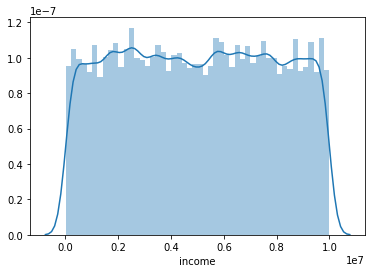

In [44]:
sns.distplot(traindata['income'])

The data is almost normally distributes, and has very little skewness. We do not need to apply any sort of transformations to make it more manageable.

In [45]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (3 * IQR)
    upper_range = Q3 + (3 * IQR)
    return lower_range,upper_range

low,high=outlier_treatment(traindata.income)

In [46]:
low,high

(-12442577.0, 22439130.0)

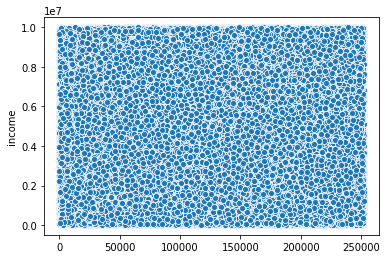

In [47]:
sns.scatterplot(traindata.index,traindata.income)

In [50]:
traindata.income.max() < high, traindata.income.min() > low #Therefore no outliers.

(True, True)

In [68]:
traindata.income.skew()

0.004479374591040176

We have to repeat the same for all other continuous variables.

Moving on, we have __age__.

In [51]:
age_low,age_high=outlier_treatment(traindata.age)

__Boxplots__ enable us to study the distributional characteristics of a group of scores as well as the level of the scores.

To begin with, scores are sorted. Then four equal sized groups are made from the ordered scores. That is, 25% of all scores are placed in each group. The lines dividing the groups are called quartiles, and the groups are referred to as quartile groups. Usually we label these groups 1 to 4 starting at the bottom.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed9f2449c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed9f248548>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed9f2444c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed9f24e0c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed9f24e648>],
 'means': []}

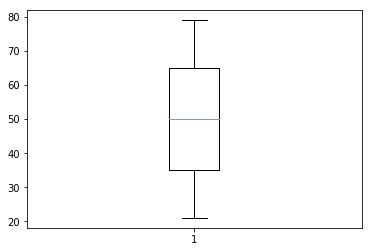

In [52]:
plt.boxplot(traindata.age)

We see that there are no outliers in here.

In [53]:
print(traindata.age.max(),traindata.age.min())
print(age_low,age_high)

79 21
-55.0 155.0


In [54]:
exp_low,exp_high=outlier_treatment(traindata.experience)
print(exp_low,exp_high)
print(traindata.experience.min(),traindata.experience.max())

-25.0 45.0
0 20


In [63]:
# Continuing the same for other features: 

cur_job_years_low,cur_job_years_high=outlier_treatment(traindata.current_job_years)
print(cur_job_years_low,cur_job_years_high)
print(traindata.current_job_years.min(),traindata.current_job_years.max())

-15.0 27.0
0 14


In [64]:
cur_house_years_low,cur_house_years_high=outlier_treatment(traindata.current_house_years)
print(cur_house_years_low,cur_house_years_high)
print(traindata.current_house_years.min(),traindata.current_house_years.max())

5.0 19.0
10 14


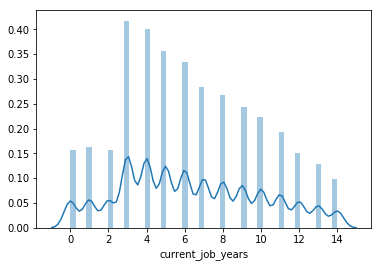

In [65]:
sns.distplot(traindata.current_job_years)

Now we see __value_counts()__ of different categories, and do binning and mapping accordingly.

In [77]:
trytrain = traindata.copy()

In [121]:
traindata.income.min(),traindata.income.max()

(10310, 9999938)

In [123]:
# We do this binning assuming income might show relation with riskiness.

bins = [-1*np.inf,1000000,5000000,np.inf]
labels=[1,2,3]
traindata['income_bin'] = pd.cut(traindata.income,labels=labels,bins=bins)
traindata.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,income_bin
247214,247215,5654491,58,13,married,rented,no,Air_traffic_controller,Madhyamgram,West_Bengal,6,11,0,3
196939,196940,5574828,74,0,single,rented,no,Engineer,Thrissur,Kerala,0,10,0,3
190285,190286,4662331,79,20,single,rented,no,Civil_servant,Barasat,West_Bengal,8,11,0,2
24161,24162,6588127,76,5,single,rented,no,Technician,Bhiwani,Haryana,5,10,1,3
194642,194643,6360265,31,18,single,rented,no,Scientist,Mumbai,Maharashtra,3,11,0,3


In [274]:
#Reflecting the same on test dataset:
testdata['income_bin'] = pd.cut(testdata.income,labels=labels,bins=bins)

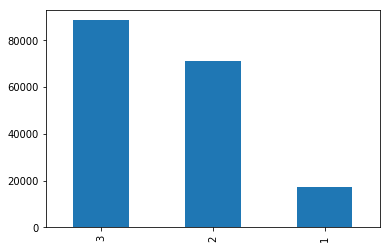

In [124]:
traindata.income_bin.value_counts().plot(kind='bar')

We repeat the same for other continuous features.

In [128]:
# BINNING age
bins = [-1*np.inf,30,40,50,60,70,np.inf]
labels = list(range(1,7))
traindata['age_bin'] = pd.cut(traindata.age,labels=labels,bins=bins)
traindata.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,income_bin,age_bin
247214,247215,5654491,58,13,married,rented,no,Air_traffic_controller,Madhyamgram,West_Bengal,6,11,0,3,4
196939,196940,5574828,74,0,single,rented,no,Engineer,Thrissur,Kerala,0,10,0,3,6
190285,190286,4662331,79,20,single,rented,no,Civil_servant,Barasat,West_Bengal,8,11,0,2,6
24161,24162,6588127,76,5,single,rented,no,Technician,Bhiwani,Haryana,5,10,1,3,6
194642,194643,6360265,31,18,single,rented,no,Scientist,Mumbai,Maharashtra,3,11,0,3,2


In [275]:
testdata['age_bin'] = pd.cut(testdata.age,labels=labels,bins=bins)

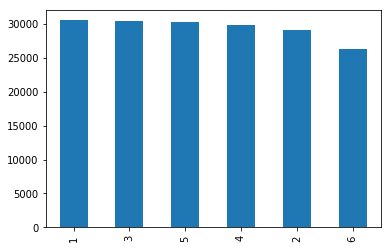

In [129]:
traindata.age_bin.value_counts().plot(kind='bar')

In [131]:
traindata.experience.value_counts(sort=False) # In a way, already binned.

0     7731
1     8026
2     7776
3     8425
4     8256
5     8709
6     9246
7     7880
8     7966
9     9162
10    8700
11    7925
12    9029
13    8147
14    8678
15    8461
16    8401
17    8485
18    8800
19    8589
20    8008
Name: experience, dtype: int64

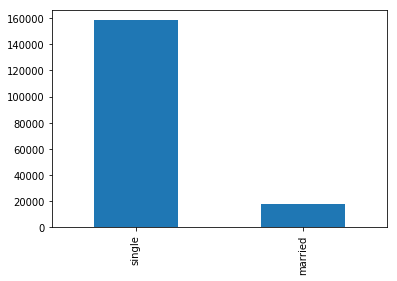

In [132]:
traindata.married.value_counts().plot(kind='bar') # We will come back to this in Multivariate Analysis

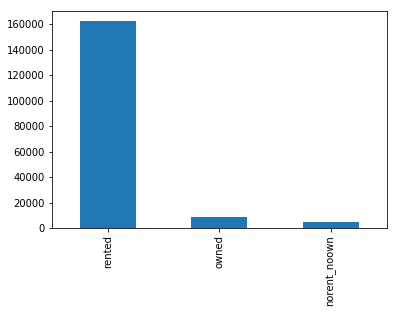

In [133]:
traindata.house_ownership.value_counts().plot(kind='bar')

In [134]:
traindata.house_ownership.value_counts()  # We will come back to this in Multivariate Analysis

rented          162457
owned             8946
norent_noown      4997
Name: house_ownership, dtype: int64

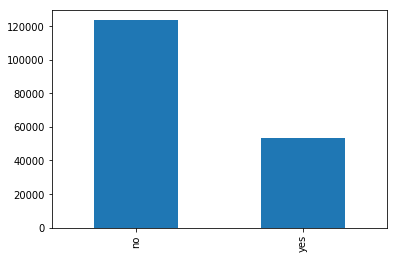

In [135]:
traindata.car_ownership.value_counts().plot(kind='bar') # We will come back to this in Multivariate Analysis

In [136]:
traindata.profession.unique()

array(['Air_traffic_controller', 'Engineer', 'Civil_servant',
       'Technician', 'Scientist', 'Secretary', 'Police_officer',
       'Hotel_Manager', 'Software_Developer', 'Lawyer', 'Firefighter',
       'Chef', 'Computer_operator', 'Microbiologist', 'Politician',
       'Consultant', 'Chartered_Accountant', 'Official', 'Analyst',
       'Economist', 'Financial_Analyst', 'Architect',
       'Petroleum_Engineer', 'Web_designer', 'Physician',
       'Chemical_engineer', 'Surgeon', 'Flight_attendant',
       'Industrial_Engineer', 'Dentist', 'Statistician',
       'Design_Engineer', 'Aviator', 'Civil_engineer', 'Psychologist',
       'Surveyor', 'Comedian', 'Army_officer', 'Magistrate', 'Drafter',
       'Technology_specialist', 'Computer_hardware_engineer',
       'Fashion_Designer', 'Graphic_Designer', 'Mechanical_engineer',
       'Designer', 'Biomedical_Engineer', 'Technical_writer', 'Geologist',
       'Artist', 'Librarian'], dtype=object)

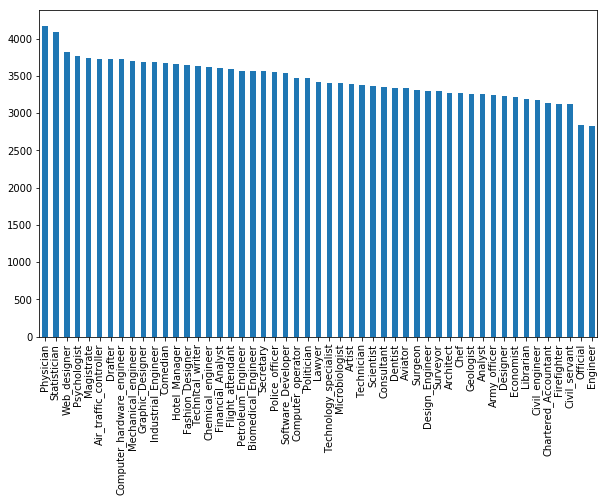

In [139]:
plt.figure(figsize=(10,6))
traindata.profession.value_counts().plot(kind='bar')

In [141]:
traindata.city.value_counts()

Aurangabad       1088
Vijayanagaram     882
Saharsa           833
Bhopal            829
Vijayawada        828
                 ... 
Bihar_Sharif      331
Bettiah           317
Katni             300
Warangal          300
Karaikudi         291
Name: city, Length: 316, dtype: int64

In [142]:
traindata.state.value_counts()

Uttar_Pradesh        20381
Maharashtra          17948
Andhra_Pradesh       17728
West_Bengal          16389
Bihar                13824
Tamil_Nadu           11509
Madhya_Pradesh        9941
Karnataka             8351
Gujarat               8005
Rajasthan             6432
Jharkhand             6335
Haryana               5477
Telangana             5255
Assam                 4911
Kerala                4081
Delhi                 3816
Punjab                3315
Odisha                3221
Chhattisgarh          2701
Uttarakhand           1303
Jammu_and_Kashmir     1271
Puducherry            1015
Mizoram                604
Manipur                598
Himachal_Pradesh       571
Tripura                565
Chandigarh             454
Sikkim                 399
Name: state, dtype: int64

What we observe here is that states from Uttarakahand to Sikkim are rare in number. Hence we club them all to one category called __Other_states__.

In [145]:
state_map = traindata.state.value_counts().to_dict()
state_map

{'Uttar_Pradesh': 20381,
 'Maharashtra': 17948,
 'Andhra_Pradesh': 17728,
 'West_Bengal': 16389,
 'Bihar': 13824,
 'Tamil_Nadu': 11509,
 'Madhya_Pradesh': 9941,
 'Karnataka': 8351,
 'Gujarat': 8005,
 'Rajasthan': 6432,
 'Jharkhand': 6335,
 'Haryana': 5477,
 'Telangana': 5255,
 'Assam': 4911,
 'Kerala': 4081,
 'Delhi': 3816,
 'Punjab': 3315,
 'Odisha': 3221,
 'Chhattisgarh': 2701,
 'Uttarakhand': 1303,
 'Jammu_and_Kashmir': 1271,
 'Puducherry': 1015,
 'Mizoram': 604,
 'Manipur': 598,
 'Himachal_Pradesh': 571,
 'Tripura': 565,
 'Chandigarh': 454,
 'Sikkim': 399}

In [146]:
traindata['state_refactored'] = np.where(traindata.state.map(state_map) < 2500, 'Other_states',traindata.state)
traindata.state_refactored.value_counts()

Uttar_Pradesh     20381
Maharashtra       17948
Andhra_Pradesh    17728
West_Bengal       16389
Bihar             13824
Tamil_Nadu        11509
Madhya_Pradesh     9941
Karnataka          8351
Gujarat            8005
Other_states       6780
Rajasthan          6432
Jharkhand          6335
Haryana            5477
Telangana          5255
Assam              4911
Kerala             4081
Delhi              3816
Punjab             3315
Odisha             3221
Chhattisgarh       2701
Name: state_refactored, dtype: int64

In [276]:
testdata['state_refactored'] = np.where(testdata.state.map(state_map) < 2500, 'Other_states',testdata.state)

In [148]:
traindata.current_job_years.value_counts(sort=False)

0      7731
1      8026
2      7776
3     20603
4     19764
5     17586
6     16491
7     14010
8     13182
9     12069
10    11016
11     9513
12     7472
13     6323
14     4838
Name: current_job_years, dtype: int64

We then continue ahead with binning.

In [149]:
bins=[-1*np.inf,3,6,9,12,np.inf]
labels=[1,2,3,4,5]
traindata['current_job_years_bin'] = pd.cut(traindata.current_job_years,labels=labels,bins=bins)


In [277]:
# Reflecting the change on test data:

testdata['current_job_years_bin'] = pd.cut(testdata.current_job_years,labels=labels,bins=bins)

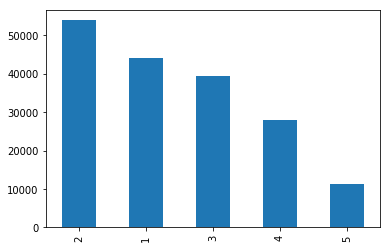

In [153]:
traindata.current_job_years_bin.value_counts().plot(kind='bar')

In [154]:
traindata.current_house_years.value_counts(sort=False) # No binning done here, as things already look good.

10    33961
11    36204
12    36503
13    35398
14    34334
Name: current_house_years, dtype: int64

## Multivariate Analysis and Feature Engineering

__Multivariate analysis__ is a statistical procedure for analysis of data involving more than one type of measurement or observation. It also means solving problems where more than one dependent variable is analyzed simultaneously with other variables.

__Feature engineering__ is the process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

In [159]:
# income & risk_flag

data = traindata.groupby(['income_bin','risk_flag']).size()
data

income_bin  risk_flag
1           0            14780
            1             2307
2           0            62431
            1             8542
3           0            77531
            1            10809
dtype: int64

Let us understand what we are doing here.

We create a variable __data__ that stores number of 0s and 1s with respect to the sub-group. And then, we calculate the ratio of number of 0s to number of 1s for every sub-group.

A higher ratio would imply lesser risk, as zero means no risk.

In [178]:
for i in range(1,4):
    print("The ratio 0/1 for label", i, " = ", data[i][0]/data[i][1]) # Higher the ratio, lesser the risk

The ratio 0/1 for label 1  =  6.406588643259645
The ratio 0/1 for label 2  =  7.308709904003746
The ratio 0/1 for label 3  =  7.172818947173652


Not much difference is observed here in between the different labels. Hence, we do not create any new feature on this basis now.

Moving on, we have __age__.

In [179]:
data_age = traindata.groupby(['age_bin','risk_flag']).size()
data_age

age_bin  risk_flag
1        0            26096
         1             4408
2        0            25711
         1             3371
3        0            26770
         1             3649
4        0            26335
         1             3537
5        0            26734
         1             3553
6        0            23096
         1             3140
dtype: int64

In [180]:
for i in range(1,7):
    print("The ratio 0/1 for label", i, " = ", data_age[i][0]/data_age[i][1])

The ratio 0/1 for label 1  =  5.9201451905626135
The ratio 0/1 for label 2  =  7.6271136161376445
The ratio 0/1 for label 3  =  7.336256508632502
The ratio 0/1 for label 4  =  7.445575346338705
The ratio 0/1 for label 5  =  7.52434562341683
The ratio 0/1 for label 6  =  7.355414012738853


In [182]:
traindata['age_high_risk_label'] = np.where(traindata.age_bin == 1,1,0)

In [278]:
# Reflecting the necessary change in test data:

testdata['age_high_risk_label'] = np.where(testdata.age_bin == 1,1,0)

In [185]:
traindata.experience.value_counts()

6     9246
9     9162
12    9029
18    8800
5     8709
10    8700
14    8678
19    8589
17    8485
15    8461
3     8425
16    8401
4     8256
13    8147
1     8026
20    8008
8     7966
11    7925
7     7880
2     7776
0     7731
Name: experience, dtype: int64

In [186]:
data_exp = traindata.groupby(['experience','risk_flag']).size()
data_exp

experience  risk_flag
0           0            6602
            1            1129
1           0            6749
            1            1277
2           0            6451
            1            1325
3           0            7331
            1            1094
4           0            7253
            1            1003
5           0            7627
            1            1082
6           0            8160
            1            1086
7           0            6909
            1             971
8           0            7026
            1             940
9           0            8117
            1            1045
10          0            7794
            1             906
11          0            6850
            1            1075
12          0            8062
            1             967
13          0            7148
            1             999
14          0            7848
            1             830
15          0            7202
            1            1259
16          0     

In [191]:
for i in range(0,data_exp.shape[0]//2):
    print("The ratio 0/1 for label", i, " = ", data_exp[i][0]/data_exp[i][1])

The ratio 0/1 for label 0  =  5.847652790079716
The ratio 0/1 for label 1  =  5.285043069694597
The ratio 0/1 for label 2  =  4.868679245283019
The ratio 0/1 for label 3  =  6.701096892138939
The ratio 0/1 for label 4  =  7.231306081754735
The ratio 0/1 for label 5  =  7.04898336414048
The ratio 0/1 for label 6  =  7.513812154696133
The ratio 0/1 for label 7  =  7.11534500514933
The ratio 0/1 for label 8  =  7.474468085106383
The ratio 0/1 for label 9  =  7.767464114832536
The ratio 0/1 for label 10  =  8.602649006622517
The ratio 0/1 for label 11  =  6.372093023255814
The ratio 0/1 for label 12  =  8.33712512926577
The ratio 0/1 for label 13  =  7.155155155155155
The ratio 0/1 for label 14  =  9.455421686746988
The ratio 0/1 for label 15  =  5.720413026211279
The ratio 0/1 for label 16  =  6.527777777777778
The ratio 0/1 for label 17  =  7.468063872255489
The ratio 0/1 for label 18  =  10.956521739130435
The ratio 0/1 for label 19  =  8.683201803833146
The ratio 0/1 for label 20  =  7

In [192]:
high_risk_exp_labels = []
for i in range(0,data_exp.shape[0]//2):
    ratio = data_exp[i][0]/data_exp[i][1]
    if ratio < 7.9:
        high_risk_exp_labels.append(i)

high_risk_exp_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 16, 17, 20]

In [194]:
def risk_check(item):
    if item in high_risk_exp_labels:
        return 1
    else:
        return 0
    
traindata['experience_high_risk_label'] = traindata['experience'].map(risk_check)

In [279]:
testdata['experience_high_risk_label'] = testdata['experience'].map(risk_check)

In [195]:
traindata['experience_high_risk_label'].value_counts()

1    132604
0     43796
Name: experience_high_risk_label, dtype: int64

In [199]:
data_house = traindata.groupby(['house_ownership','risk_flag']).size()
data_house

house_ownership  risk_flag
norent_noown     0              4499
                 1               498
owned            0              8170
                 1               776
rented           0            142073
                 1             20384
dtype: int64

In [205]:
for i in list(traindata.house_ownership.unique()):
    print("The ratio 0/1 for label", i, " = ", data_house[i][0]/data_house[i][1])

The ratio 0/1 for label rented  =  6.969829277864992
The ratio 0/1 for label owned  =  10.528350515463918
The ratio 0/1 for label norent_noown  =  9.034136546184738


In [206]:
traindata['house_ownership_high_risk_label'] = np.where(traindata.house_ownership == 'rented',1,0)

In [280]:
testdata['house_ownership_high_risk_label'] = np.where(testdata.house_ownership == 'rented',1,0)

In [207]:
traindata['house_ownership_high_risk_label'].value_counts()

1    162457
0     13943
Name: house_ownership_high_risk_label, dtype: int64

In [210]:
# Profession

high_risk_profession=[]
medium_risk_profession=[]
low_risk_profession=[]

data_prof = traindata.groupby(['profession','risk_flag']).size()
for i in list(traindata.profession.unique()):
    ratio = data_prof[i][0]/data_prof[i][1]
    if ratio < 6:
        high_risk_profession.append(i)
    elif ratio >6 and ratio < 8:
        medium_risk_profession.append(i)
    else:
        low_risk_profession.append(i)
        
print('Low risk professions = ',low_risk_profession,'\n')
print('Medium risk professions = ',medium_risk_profession,'\n')
print('High risk professions = ',high_risk_profession,'\n')
    

Low risk professions =  ['Politician', 'Economist', 'Financial_Analyst', 'Petroleum_Engineer', 'Web_designer', 'Industrial_Engineer', 'Dentist', 'Design_Engineer', 'Drafter', 'Technology_specialist', 'Mechanical_engineer', 'Designer', 'Librarian'] 

Medium risk professions =  ['Air_traffic_controller', 'Engineer', 'Civil_servant', 'Technician', 'Secretary', 'Hotel_Manager', 'Lawyer', 'Firefighter', 'Chef', 'Computer_operator', 'Microbiologist', 'Consultant', 'Official', 'Analyst', 'Architect', 'Physician', 'Chemical_engineer', 'Surgeon', 'Flight_attendant', 'Statistician', 'Aviator', 'Civil_engineer', 'Psychologist', 'Comedian', 'Magistrate', 'Computer_hardware_engineer', 'Fashion_Designer', 'Graphic_Designer', 'Biomedical_Engineer', 'Technical_writer', 'Geologist', 'Artist'] 

High risk professions =  ['Scientist', 'Police_officer', 'Software_Developer', 'Chartered_Accountant', 'Surveyor', 'Army_officer'] 



In [211]:
traindata['is_low_risk_profession'] = traindata.profession.apply(lambda x: 1 if x in low_risk_profession else 0)
traindata['is_medium_risk_profession'] = traindata.profession.apply(lambda x: 1 if x in medium_risk_profession else 0)
traindata['is_high_risk_profession'] = traindata.profession.apply(lambda x: 1 if x in high_risk_profession else 0)
        

In [281]:
# Reflecting the above changes in test data:

testdata['is_low_risk_profession'] = testdata.profession.apply(lambda x: 1 if x in low_risk_profession else 0)
testdata['is_medium_risk_profession'] = testdata.profession.apply(lambda x: 1 if x in medium_risk_profession else 0)
testdata['is_high_risk_profession'] = testdata.profession.apply(lambda x: 1 if x in high_risk_profession else 0)

Just some random __value_counts()__ to see if everything is alright:

In [213]:
traindata['is_low_risk_profession'].value_counts()


0    131152
1     45248
Name: is_low_risk_profession, dtype: int64

In [214]:
traindata['is_medium_risk_profession'].value_counts()


1    111026
0     65374
Name: is_medium_risk_profession, dtype: int64

In [215]:
traindata['is_high_risk_profession'].value_counts()

0    156274
1     20126
Name: is_high_risk_profession, dtype: int64

In [217]:
# City

high_risk_city=[]
medium_risk_city=[]
low_risk_city=[]

data_city = traindata.groupby(['city','risk_flag']).size()
for i in list(traindata.city.unique()):
    ratio = data_city[i][0]/data_city[i][1]
    if ratio < 6:
        high_risk_city.append(i)
    elif ratio >6 and ratio < 8:
        medium_risk_city.append(i)
    else:
        low_risk_city.append(i)
        
print('Low risk cities = ',low_risk_city,'\n')
print('Medium risk cities = ',medium_risk_city,'\n')
print('High risk cities = ',high_risk_city,'\n')

Low risk cities =  ['Bhiwani', 'Unnao', 'Dharmavaram', 'Amaravati', 'Arrah', 'Adoni', 'Asansol', 'Fatehpur', 'Thoothukudi', 'Kolkata', 'Tirupati', 'Mira-Bhayandar', 'Hindupur', 'Bharatpur', 'Baranagar', 'Surat', 'Hospet', 'Gandhinagar', 'Gangtok', 'Khora,_Ghaziabad', 'Erode', 'Ballia', 'Orai', 'Bidar', 'Nandyal', 'Shivpuri', 'Sultan_Pur_Majra', 'Rampur', 'Pimpri-Chinchwad', 'Medininagar', 'Hapur', 'Bhalswa_Jahangir_Pur', 'Malegaon', 'Panihati', 'Eluru', 'Saharsa', 'Loni', 'Bhatpara', 'Bongaigaon', 'Anantapuram', 'Kishanganj', 'Nadiad', 'Thanjavur', 'Khammam', 'Chinsurah', 'Jodhpur', 'Jamshedpur', 'Mangalore', 'Tiruppur', 'Bellary', 'Tiruvottiyur', 'Ahmednagar', 'Pondicherry', 'Bathinda', 'Latur', 'Gurgaon', 'Rohtak', 'Shimoga', 'Nashik', 'Durgapur', 'Chandigarh_city', 'Siwan', 'Rajpur_Sonarpur', 'Warangal', 'Meerut', 'Guntakal', 'Amroha', 'Aurangabad', 'Karnal', 'Jamnagar', 'Sirsa', 'Akola', 'Patiala', 'Bally', 'Nellore', 'Farrukhabad', 'South_Dumdum', 'Muzaffarpur', 'Lucknow', 'Bihar_

In [218]:
traindata['is_low_risk_city'] = traindata.city.apply(lambda x: 1 if x in low_risk_city else 0)
traindata['is_medium_risk_city'] = traindata.city.apply(lambda x: 1 if x in medium_risk_city else 0)
traindata['is_high_risk_city'] = traindata.city.apply(lambda x: 1 if x in high_risk_city else 0)

In [282]:
# Reflecting the above changes in test data:

testdata['is_low_risk_city'] = testdata.city.apply(lambda x: 1 if x in low_risk_city else 0)
testdata['is_medium_risk_city'] = testdata.city.apply(lambda x: 1 if x in medium_risk_city else 0)
testdata['is_high_risk_city'] = testdata.city.apply(lambda x: 1 if x in high_risk_city else 0)

In [219]:
traindata['is_high_risk_city'].value_counts()

0    128103
1     48297
Name: is_high_risk_city, dtype: int64

In [223]:
# State

high_risk_state=[]
medium_risk_state=[]
low_risk_state=[]

data_state = traindata.groupby(['state_refactored','risk_flag']).size()
for i in list(traindata.state_refactored.unique()):
    ratio = data_state[i][0]/data_state[i][1]
    if ratio < 6:
        high_risk_state.append(i)
    elif ratio >6 and ratio < 8:
        medium_risk_state.append(i)
    else:
        low_risk_state.append(i)
        
print('Low risk states = ',low_risk_state,'\n')
print('Medium risk states = ',medium_risk_state,'\n')
print('High risk states = ',high_risk_state,'\n')

Low risk states =  ['Tamil_Nadu', 'Karnataka', 'Delhi', 'Punjab'] 

Medium risk states =  ['West_Bengal', 'Haryana', 'Maharashtra', 'Andhra_Pradesh', 'Uttar_Pradesh', 'Assam', 'Odisha', 'Other_states', 'Gujarat', 'Telangana', 'Rajasthan', 'Bihar', 'Chhattisgarh', 'Jharkhand'] 

High risk states =  ['Kerala', 'Madhya_Pradesh'] 



In [224]:
traindata['is_low_risk_state'] = traindata.state_refactored.apply(lambda x: 1 if x in low_risk_state else 0)
traindata['is_medium_risk_state'] = traindata.state_refactored.apply(lambda x: 1 if x in medium_risk_state else 0)
traindata['is_high_risk_state'] = traindata.state_refactored.apply(lambda x: 1 if x in high_risk_state else 0)

In [283]:
# Reflecting the above changes in test data:

testdata['is_low_risk_state'] = testdata.state_refactored.apply(lambda x: 1 if x in low_risk_state else 0)
testdata['is_medium_risk_state'] = testdata.state_refactored.apply(lambda x: 1 if x in medium_risk_state else 0)
testdata['is_high_risk_state'] = testdata.state_refactored.apply(lambda x: 1 if x in high_risk_state else 0)

In [225]:
traindata['is_high_risk_state'].value_counts()

0    162378
1     14022
Name: is_high_risk_state, dtype: int64

In [228]:
# Current job years bin

high_risk_job_years=[]
medium_risk_job_years=[]
low_risk_job_years=[]

data_job_years = traindata.groupby(['current_job_years_bin','risk_flag']).size()
for i in list(traindata.current_job_years_bin.unique()):
    ratio = data_job_years[i][0]/data_job_years[i][1]
    print(ratio)
    if ratio < 6:
        high_risk_job_years.append(i)
    elif ratio >6 and ratio < 8:
        medium_risk_job_years.append(i)
    else:
        low_risk_job_years.append(i)
        
print('Low risk states = ',low_risk_job_years,'\n')
print('Medium risk states = ',medium_risk_job_years,'\n')
print('High risk states = ',high_risk_job_years,'\n')  

# No need to categorize further

7.6104269950423795
6.227116423775994
7.713049267643142
6.649760109664154
7.401140114011401
Low risk states =  [] 

Medium risk states =  [2, 1, 3, 5, 4] 

High risk states =  [] 



All of them fall into the same category. Hence we do not have to create new features from this feature. The same phenomenon is seen in __current_house_years__ as well.

In [229]:
# Current House Years

high_risk_house_years=[]
medium_risk_house_years=[]
low_risk_house_years=[]

data_house_years = traindata.groupby(['current_house_years','risk_flag']).size()
for i in list(traindata.current_house_years.unique()):
    ratio = data_house_years[i][0]/data_house_years[i][1]
    print(ratio)
    if ratio < 6:
        high_risk_house_years.append(i)
    elif ratio >6 and ratio < 8:
        medium_risk_house_years.append(i)
    else:
        low_risk_house_years.append(i)
        
print('Low risk states = ',high_risk_house_years,'\n')
print('Medium risk states = ',medium_risk_house_years,'\n')
print('High risk states = ',high_risk_house_years,'\n')

# No need to categorize further

7.03462050599201
6.925554259043174
7.2810798548094375
7.237523992322457
7.249359123747379
Low risk states =  [] 

Medium risk states =  [11, 10, 12, 14, 13] 

High risk states =  [] 



In [230]:
# Columns as of here:

traindata.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag', 'income_bin', 'age_bin',
       'state_refactored', 'current_job_years_bin', 'age_high_risk_label',
       'experience_high_risk_label', 'house_ownership_high_risk_label',
       'is_low_risk_profession', 'is_medium_risk_profession',
       'is_high_risk_profession', 'is_low_risk_city', 'is_medium_risk_city',
       'is_high_risk_city', 'is_low_risk_state', 'is_medium_risk_state',
       'is_high_risk_state'],
      dtype='object')

In [232]:
trytrain = traindata.copy()

### Feature Elimination

It is the process of reducing the number of input variables to those that are most useful in predicting the target variable when developing a predictive model.

In [238]:
cols_to_drop = ['Id','city','state','state_refactored','current_job_years','profession']

In [239]:
traindata.drop(cols_to_drop,axis=1,inplace=True)

In [285]:
testdata.drop(cols_to_drop,axis=1,inplace=True)

In [240]:
traindata.columns

Index(['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'current_house_years', 'risk_flag', 'income_bin',
       'age_bin', 'current_job_years_bin', 'age_high_risk_label',
       'experience_high_risk_label', 'house_ownership_high_risk_label',
       'is_low_risk_profession', 'is_medium_risk_profession',
       'is_high_risk_profession', 'is_low_risk_city', 'is_medium_risk_city',
       'is_high_risk_city', 'is_low_risk_state', 'is_medium_risk_state',
       'is_high_risk_state'],
      dtype='object')

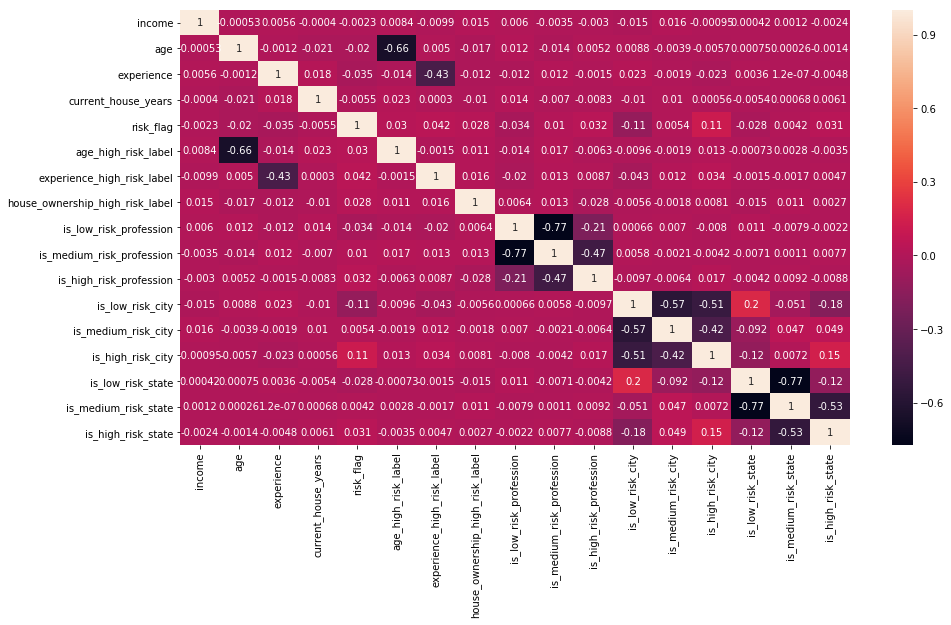

In [244]:
plt.figure(figsize=(15,8))
sns.heatmap(traindata.corr(),annot=True)

In [245]:
traindata.dtypes

income                                int64
age                                   int64
experience                            int64
married                              object
house_ownership                      object
car_ownership                        object
current_house_years                   int64
risk_flag                             int64
income_bin                         category
age_bin                            category
current_job_years_bin              category
age_high_risk_label                   int32
experience_high_risk_label            int64
house_ownership_high_risk_label       int32
is_low_risk_profession                int64
is_medium_risk_profession             int64
is_high_risk_profession               int64
is_low_risk_city                      int64
is_medium_risk_city                   int64
is_high_risk_city                     int64
is_low_risk_state                     int64
is_medium_risk_state                  int64
is_high_risk_state              

Although binning implies categorization, here in our case we convert it to __int__ for the sake of simplicity.

In [246]:
traindata['income_bin'] = traindata['income_bin'].astype('int64')
traindata['age_bin'] = traindata['income_bin'].astype('int64')
traindata['current_job_years_bin'] = traindata['income_bin'].astype('int64')

In [286]:
# Reflecting the necessary changes on test data:

testdata['income_bin'] = testdata['income_bin'].astype('int64')
testdata['age_bin'] = testdata['income_bin'].astype('int64')
testdata['current_job_years_bin'] = testdata['income_bin'].astype('int64')

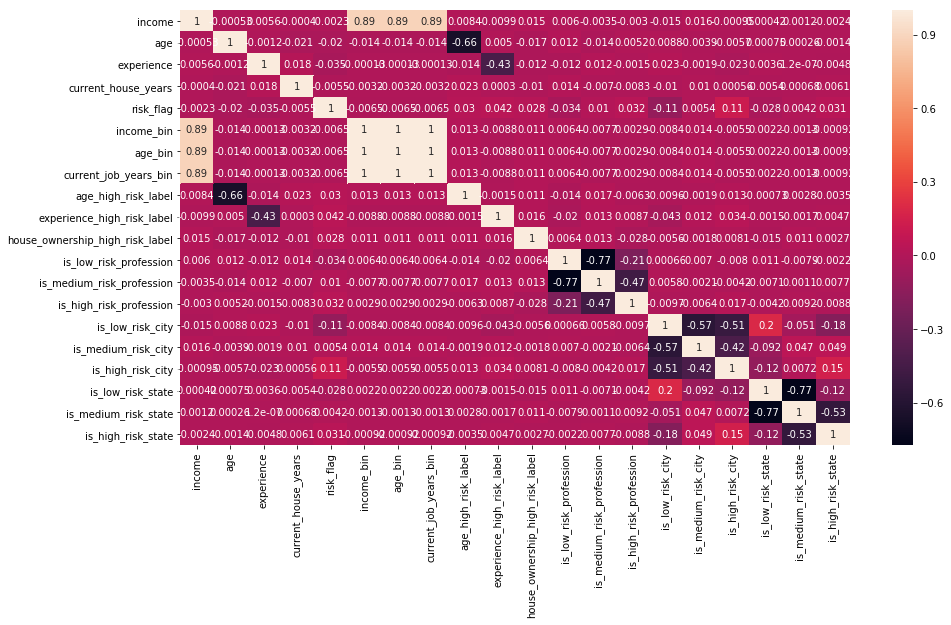

In [248]:
plt.figure(figsize=(15,8))
sns.heatmap(traindata.corr(),annot=True)

In [249]:
traindata.age_bin == traindata.current_job_years_bin

247214    True
196939    True
190285    True
24161     True
194642    True
          ... 
232422    True
124605    True
20463     True
18638     True
35683     True
Length: 176400, dtype: bool

In [252]:
traindata.loc[traindata.age_bin != traindata.current_job_years_bin]

,income,age,experience,married,house_ownership,car_ownership,current_house_years,risk_flag,income_bin,age_bin,...,house_ownership_high_risk_label,is_low_risk_profession,is_medium_risk_profession,is_high_risk_profession,is_low_risk_city,is_medium_risk_city,is_high_risk_city,is_low_risk_state,is_medium_risk_state,is_high_risk_state


__age_bin__ and __current_job_years__ - these two columns have a high correlation. We may thus remove one of them.

What we also see here is that these two columns are same everywhere. So we need to get rid of one of them. Since they are the same everywhere, we can remove any of them.

In [253]:
traindata.drop('current_job_years_bin',axis=1,inplace=True)

In [287]:
testdata.drop('current_job_years_bin',axis=1,inplace=True)

In [254]:
traindata.loc[traindata.age_bin != traindata.income_bin]

,income,age,experience,married,house_ownership,car_ownership,current_house_years,risk_flag,income_bin,age_bin,...,house_ownership_high_risk_label,is_low_risk_profession,is_medium_risk_profession,is_high_risk_profession,is_low_risk_city,is_medium_risk_city,is_high_risk_city,is_low_risk_state,is_medium_risk_state,is_high_risk_state


In similar fashion, we remove another column.

In [255]:
traindata.drop('age_bin',axis=1,inplace=True)

In [288]:
testdata.drop('age_bin',axis=1,inplace=True)

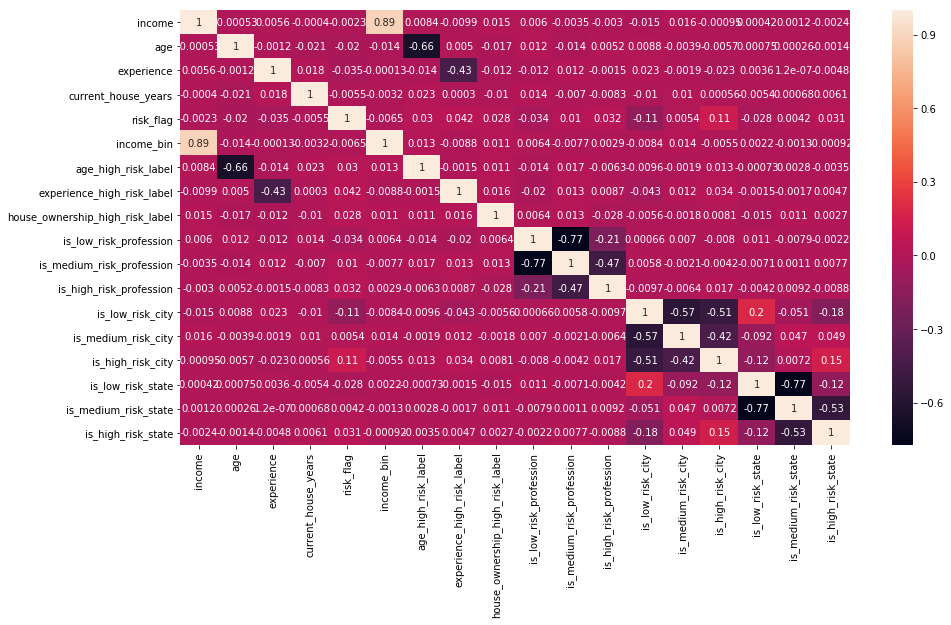

In [256]:
plt.figure(figsize=(15,8))
sns.heatmap(traindata.corr(),annot=True)

In [257]:
traindata.dtypes

income                              int64
age                                 int64
experience                          int64
married                            object
house_ownership                    object
car_ownership                      object
current_house_years                 int64
risk_flag                           int64
income_bin                          int64
age_high_risk_label                 int32
experience_high_risk_label          int64
house_ownership_high_risk_label     int32
is_low_risk_profession              int64
is_medium_risk_profession           int64
is_high_risk_profession             int64
is_low_risk_city                    int64
is_medium_risk_city                 int64
is_high_risk_city                   int64
is_low_risk_state                   int64
is_medium_risk_state                int64
is_high_risk_state                  int64
dtype: object

In [258]:
x_train=traindata.drop('risk_flag',axis=1)

In [289]:
x_test=testdata.drop('risk_flag',axis=1)

### One hot encoding

The model only understands numbers, not categories. This is where the string variable is removed and a new binary variable is added for each string value. We use the __get_dummies()__ function of pandas for the same.

In [259]:
x_train=pd.get_dummies(x_train)

In [290]:
x_test=pd.get_dummies(x_test)

In [260]:
x_train.shape

(176400, 24)

In [291]:
x_test.shape

(75600, 24)

In [261]:
x_train.dtypes

income                             int64
age                                int64
experience                         int64
current_house_years                int64
income_bin                         int64
age_high_risk_label                int32
experience_high_risk_label         int64
house_ownership_high_risk_label    int32
is_low_risk_profession             int64
is_medium_risk_profession          int64
is_high_risk_profession            int64
is_low_risk_city                   int64
is_medium_risk_city                int64
is_high_risk_city                  int64
is_low_risk_state                  int64
is_medium_risk_state               int64
is_high_risk_state                 int64
married_married                    uint8
married_single                     uint8
house_ownership_norent_noown       uint8
house_ownership_owned              uint8
house_ownership_rented             uint8
car_ownership_no                   uint8
car_ownership_yes                  uint8
dtype: object

### Embedded method for Feature Elimination

We use RandomForestClassifier to find out the most important features of our model.

In [266]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    
    # create the random forest model
    model = RandomForestClassifier(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(20).plot(kind='barh')  
    return final_df

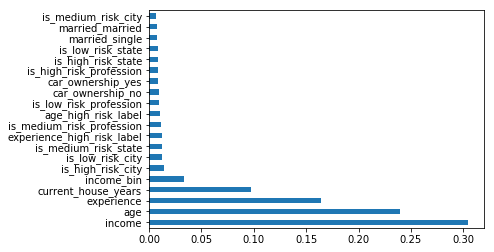

In [267]:
feature_importance=tree_based_feature_importance(x_train,y_train)

In [268]:
selected_features=list(feature_importance['Features'][0:14])
selected_features

['income',
 'age',
 'experience',
 'current_house_years',
 'income_bin',
 'is_high_risk_city',
 'is_low_risk_city',
 'is_medium_risk_state',
 'experience_high_risk_label',
 'is_medium_risk_profession',
 'age_high_risk_label',
 'is_low_risk_profession',
 'car_ownership_no',
 'car_ownership_yes']

## ML Modeling

We are now ready to feed our features from the train dataset to a machine learning algorithm and obtain predictions.

We try out different algorithms for the same. Beginning with __Logistic Regression__:

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. The approach allows an algorithm being used in a machine learning application to classify incoming data based on historical data.

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [306]:
model = LogisticRegression(random_state=0)

In [307]:
model.fit(x_train,y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [308]:
model.classes_

array([0, 1], dtype=int64)

In [309]:
model.predict_proba(x_test)

array([[0.76004972, 0.23995028],
       [0.94067371, 0.05932629],
       [0.71778894, 0.28221106],
       ...,
       [0.73244037, 0.26755963],
       [0.66443247, 0.33556753],
       [0.53178249, 0.46821751]])

In [310]:
predictions = model.predict(x_test)

In [311]:
predictions


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [312]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
13385,0,0
43747,1,0
192188,0,0
54345,0,0
155866,0,0
...,...,...
173016,0,0
176454,0,0
87861,0,0
78740,0,0


In [313]:
df.Predicted.value_counts()

0    75600
Name: Predicted, dtype: int64

Since Logistic Regression did not give us satisfying results, we consider another classification algorithm called __RandomForestClassifier__.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In simple terms, this is what happens in a Random Forest Algorithm:

Suppose you want to predict what percentage you will score in your boards exams. For this, you reach out to different learned people. When you meet the first person, he will ask you several questions, for example, your current level of preparation, what subjects you have a grip on, the number of practice papers you have solved, and so on. Based upon your answers, he will give you a predicted percentage. But you decide just one person will not give you an accurate answer. You now go to the another person, and she asks you a different set of questions, and based upon your answers, predicts your result percentage. Likewise, you go to several other people, and average out the values of their predictions, and thus you get your final prediction. This is essentially what we call the Random Forest Algorithm.

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
clf = RandomForestClassifier()

In [316]:
clf.fit(x_train, y_train)       #Fitting the model to our data
predictions = clf.predict(x_test)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [317]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [318]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df2

,Actual,Predicted
13385,0,0
43747,1,1
192188,0,0
54345,0,0
155866,0,0
...,...,...
173016,0,0
176454,0,0
87861,0,0
78740,0,0


In [319]:
clf.score(x_test,y_test) # Score shows the accuracy of our model

0.8799603174603174

Next up, we draw its __confusion matrix__.

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. 

In [324]:
confusion_matrix(y_test, predictions)

array([[63941,  2321],
       [ 6754,  2584]], dtype=int64)

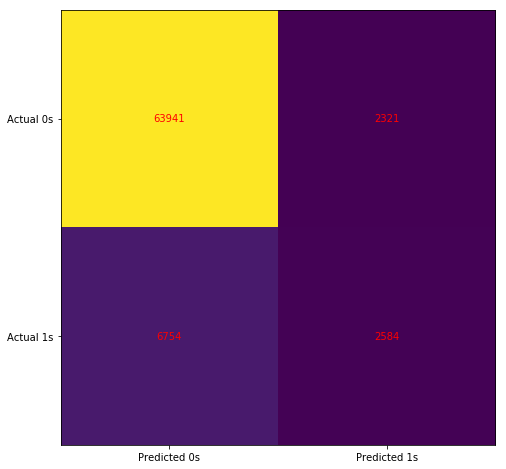

In [325]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Thus, Overall Accuracy:

Accuracy = (True Negatives + True Positives) / (True Negatives + False Negatives + True Positives + False Positives)

         = (63941+2584) / (63941+6754+2584+2321)
         
         = 0.8799
         
         = 88%

## Thus, Overall Accuracy = 88%

#### End